In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
from datetime import datetime
from datetime import timedelta

In [3]:
now = datetime.now()
now

datetime.datetime(2016, 8, 17, 10, 19, 58, 971712)

In [4]:
now.year, now.month, now.day

(2016, 8, 17)

In [6]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta

datetime.timedelta(926, 56700)

In [7]:
delta.days, delta.seconds

(926, 56700)

In [9]:
start = datetime(2011, 1, 7)

In [10]:
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [11]:
start + 2*timedelta(12)

datetime.datetime(2011, 1, 31, 0, 0)

In [13]:
stamp = datetime(2011, 1, 3)
stamp

datetime.datetime(2011, 1, 3, 0, 0)

In [14]:
str(stamp)

'2011-01-03 00:00:00'

In [15]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [16]:
value = '2011-01-03'

In [19]:
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [21]:
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [22]:
from dateutil.parser import parse

In [23]:
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [24]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [25]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [26]:
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06', '2011-08-06'], dtype='datetime64[ns]', freq=None)

In [28]:
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06', '2011-08-06', 'NaT'], dtype='datetime64[ns]', freq=None)

In [29]:
pd.isnull(idx)

array([False, False,  True], dtype=bool)

In [30]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), datetime(2011, 1, 7),
datetime(2011, 1, 8), datetime(2011, 1, 10), datetime(2011, 1, 12)]

In [32]:
ts = pd.Series(np.random.randn(len(dates)), index=dates)
ts

2011-01-02   -0.216856
2011-01-05    0.791315
2011-01-07   -0.560328
2011-01-08    0.983550
2011-01-10    0.556756
2011-01-12    1.996554
dtype: float64

In [34]:
type(ts)

pandas.core.series.Series

In [35]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [39]:
ts + ts[::2]

2011-01-02   -0.433712
2011-01-05         NaN
2011-01-07   -1.120655
2011-01-08         NaN
2011-01-10    1.113512
2011-01-12         NaN
dtype: float64

In [40]:
ts.index.dtype

dtype('<M8[ns]')

In [41]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

In [42]:
stamp = ts.index[2]

In [44]:
ts[stamp]

-0.56032754956736053

In [47]:
ts['1/10/2011']

0.55675603193285927

In [48]:
ts['20110110']

0.55675603193285927

In [57]:
longer_ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
len(longer_ts)

1000

In [59]:
len(longer_ts['2001'])

365

In [60]:
len(longer_ts['2001-05'])

31

In [63]:
ts[datetime(2011, 1, 7):]

2011-01-07   -0.560328
2011-01-08    0.983550
2011-01-10    0.556756
2011-01-12    1.996554
dtype: float64

In [64]:
ts['1/6/2011':'1/11/2011']

2011-01-07   -0.560328
2011-01-08    0.983550
2011-01-10    0.556756
dtype: float64

In [65]:
ts[datetime(2011,1,8): datetime(2011,1,10)]

2011-01-08    0.983550
2011-01-10    0.556756
dtype: float64

In [66]:
ts.truncate(after='1/9/2011')

2011-01-02   -0.216856
2011-01-05    0.791315
2011-01-07   -0.560328
2011-01-08    0.983550
dtype: float64

In [70]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')

In [71]:
long_df = pd.DataFrame(np.random.randn(100, 4), index=dates, 
                       columns = ['Colorado', 'Texas', 'New York', 'Ohio'])

In [72]:
long_df.ix['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,-0.425245,0.163855,0.212152,0.549234
2001-05-09,-1.112946,-1.219367,-1.586331,-1.718037
2001-05-16,0.321109,-3.384081,1.684841,-1.111415
2001-05-23,-0.296334,-0.314080,0.602726,-0.001097
2001-05-30,-1.497965,0.768153,1.384372,0.271354


In [74]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000', '1/3/2000'])

In [76]:
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [77]:
dup_ts.index.is_unique

False

In [80]:
dup_ts.groupby(level=0).mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32

In [82]:
dup_ts.groupby(level=0).count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

In [84]:
ts.resample('D')

2011-01-02   -0.216856
2011-01-03         NaN
2011-01-04         NaN
2011-01-05    0.791315
2011-01-06         NaN
2011-01-07   -0.560328
2011-01-08    0.983550
2011-01-09         NaN
2011-01-10    0.556756
2011-01-11         NaN
2011-01-12    1.996554
Freq: D, dtype: float64

In [3]:
index = pd.date_range('4/1/2012', '6/1/2012')

In [4]:
pd.date_range(start='4/1/2012', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [5]:
pd.date_range(end='6/1/2012', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [7]:
pd.date_range('1/1/2000', '12/1/2000', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [8]:
pd.date_range('5/2/2012 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [9]:
pd.date_range('5/2/2012 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

In [11]:
from pandas.tseries.offsets import Hour, Minute
hour = Hour()
hour

<Hour>

In [13]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [15]:
pd.date_range('1/1/2000', '1/3/2000 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [16]:
Hour(2) + Minute(30)

<150 * Minutes>

In [17]:
pd.date_range('1/1/2000', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

In [19]:
# week of month dates
rng = pd.date_range('1/1/2012', '9/1/2012', freq='WOM-3FRI')
rng

DatetimeIndex(['2012-01-20', '2012-02-17', '2012-03-16', '2012-04-20',
               '2012-05-18', '2012-06-15', '2012-07-20', '2012-08-17'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

In [31]:
ts = pd.Series(np.random.randn(4), index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31    0.230865
2000-02-29    1.783808
2000-03-31    0.865407
2000-04-30    0.948265
Freq: M, dtype: float64

In [27]:
ts/ ts.shift(1)-1

2000-01-31         NaN
2000-02-29    0.465161
2000-03-31   -3.164081
2000-04-30   -0.059536
Freq: M, dtype: float64

In [28]:
ts.shift(2, freq='M')

2000-03-31    0.287136
2000-04-30    0.420700
2000-05-31   -0.910430
2000-06-30   -0.856227
Freq: M, dtype: float64

In [29]:
ts.shift(3, freq='D')

2000-02-03    0.287136
2000-03-03    0.420700
2000-04-03   -0.910430
2000-05-03   -0.856227
dtype: float64

In [30]:
ts.shift(1, freq='90T')

2000-01-31 01:30:00    0.287136
2000-02-29 01:30:00    0.420700
2000-03-31 01:30:00   -0.910430
2000-04-30 01:30:00   -0.856227
Freq: M, dtype: float64

In [32]:
from pandas.tseries.offsets import Day, MonthEnd
now = datetime(2011, 11, 17)
now + 3*Day()

Timestamp('2011-11-20 00:00:00')

In [33]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [35]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [37]:
offset = MonthEnd()
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [38]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [40]:
ts = pd.Series(np.random.randn(20), index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts

2000-01-15   -0.144062
2000-01-19    0.570661
2000-01-23    0.586985
2000-01-27   -1.207306
2000-01-31    0.660155
2000-02-04   -0.681698
2000-02-08    0.649635
2000-02-12    2.153462
2000-02-16    0.175664
2000-02-20   -0.640342
2000-02-24   -0.217812
2000-02-28    0.573583
2000-03-03   -0.257222
2000-03-07   -1.206668
2000-03-11   -0.675308
2000-03-15   -0.612620
2000-03-19    0.229857
2000-03-23   -0.046076
2000-03-27    0.637215
2000-03-31    0.009773
Freq: 4D, dtype: float64

In [41]:
ts.groupby(MonthEnd().rollforward).mean()

2000-01-31    0.093287
2000-02-29    0.287499
2000-03-31   -0.240131
dtype: float64

In [43]:
ts.resample('M', how='mean')

2000-01-31    0.093287
2000-02-29    0.287499
2000-03-31   -0.240131
Freq: M, dtype: float64

In [44]:
import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [46]:
tz = pytz.timezone('US/Eastern')
tz

<DstTzInfo 'US/Eastern' LMT-1 day, 19:04:00 STD>

In [47]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [50]:
ts.index

DatetimeIndex(['2012-03-09 09:30:00', '2012-03-10 09:30:00',
               '2012-03-11 09:30:00', '2012-03-12 09:30:00',
               '2012-03-13 09:30:00', '2012-03-14 09:30:00'],
              dtype='datetime64[ns]', freq='D')

In [51]:
ts.index.tz

In [56]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')


DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [58]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-09 09:30:00+00:00    0.368670
2012-03-10 09:30:00+00:00   -0.907028
2012-03-11 09:30:00+00:00   -1.159314
2012-03-12 09:30:00+00:00   -0.212189
2012-03-13 09:30:00+00:00    0.952717
2012-03-14 09:30:00+00:00   -0.605305
Freq: D, dtype: float64

In [59]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [60]:
ts_utc.tz_convert('US/Eastern')

2012-03-09 04:30:00-05:00    0.368670
2012-03-10 04:30:00-05:00   -0.907028
2012-03-11 05:30:00-04:00   -1.159314
2012-03-12 05:30:00-04:00   -0.212189
2012-03-13 05:30:00-04:00    0.952717
2012-03-14 05:30:00-04:00   -0.605305
Freq: D, dtype: float64

In [62]:
ts_eastern = ts.tz_localize('US/Eastern')
ts_eastern

2012-03-09 09:30:00-05:00    0.368670
2012-03-10 09:30:00-05:00   -0.907028
2012-03-11 09:30:00-04:00   -1.159314
2012-03-12 09:30:00-04:00   -0.212189
2012-03-13 09:30:00-04:00    0.952717
2012-03-14 09:30:00-04:00   -0.605305
Freq: D, dtype: float64

In [63]:
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00    0.368670
2012-03-10 14:30:00+00:00   -0.907028
2012-03-11 13:30:00+00:00   -1.159314
2012-03-12 13:30:00+00:00   -0.212189
2012-03-13 13:30:00+00:00    0.952717
2012-03-14 13:30:00+00:00   -0.605305
Freq: D, dtype: float64

In [64]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00    0.368670
2012-03-10 15:30:00+01:00   -0.907028
2012-03-11 14:30:00+01:00   -1.159314
2012-03-12 14:30:00+01:00   -0.212189
2012-03-13 14:30:00+01:00    0.952717
2012-03-14 14:30:00+01:00   -0.605305
Freq: D, dtype: float64

In [65]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

In [4]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('utc')

In [6]:
stamp_utc.tz_convert('US/Eastern')

Timestamp('2011-03-11 23:00:00-0500', tz='US/Eastern')

In [8]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [9]:
stamp_utc.value

1299902400000000000

In [10]:
stamp_utc.tz_convert('US/Eastern').value

1299902400000000000

In [11]:
from pandas.tseries.offsets import Hour

In [13]:
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [14]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [15]:
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [16]:
stamp + 2*Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

In [18]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-07 09:30:00    1.292068
2012-03-08 09:30:00    0.089988
2012-03-09 09:30:00    1.171545
2012-03-12 09:30:00    0.691697
2012-03-13 09:30:00   -1.675979
2012-03-14 09:30:00   -0.548021
2012-03-15 09:30:00   -0.593546
2012-03-16 09:30:00   -1.021161
2012-03-19 09:30:00    1.192955
2012-03-20 09:30:00   -3.628211
Freq: B, dtype: float64

In [20]:
ts1 = ts[:7].tz_localize('Europe/London')
ts1

2012-03-07 09:30:00+00:00    1.292068
2012-03-08 09:30:00+00:00    0.089988
2012-03-09 09:30:00+00:00    1.171545
2012-03-12 09:30:00+00:00    0.691697
2012-03-13 09:30:00+00:00   -1.675979
2012-03-14 09:30:00+00:00   -0.548021
2012-03-15 09:30:00+00:00   -0.593546
Freq: B, dtype: float64

In [22]:
ts2 = ts1[2:].tz_convert('Europe/Moscow')
ts2

2012-03-09 13:30:00+04:00    1.171545
2012-03-12 13:30:00+04:00    0.691697
2012-03-13 13:30:00+04:00   -1.675979
2012-03-14 13:30:00+04:00   -0.548021
2012-03-15 13:30:00+04:00   -0.593546
Freq: B, dtype: float64

In [24]:
result = ts1 + ts2
result.index # Became UTC

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

In [25]:
result

2012-03-07 09:30:00+00:00         NaN
2012-03-08 09:30:00+00:00         NaN
2012-03-09 09:30:00+00:00    2.343089
2012-03-12 09:30:00+00:00    1.383395
2012-03-13 09:30:00+00:00   -3.351959
2012-03-14 09:30:00+00:00   -1.096042
2012-03-15 09:30:00+00:00   -1.187092
Freq: B, dtype: float64

In [26]:
p = pd.Period(2007, freq='A-DEC')
p
# full timespan from January 1, 2007 to December 31, 2007

Period('2007', 'A-DEC')

In [27]:
p + 5

Period('2012', 'A-DEC')

In [28]:
pd.Period('2014', freq='A-DEC') - p

7

In [30]:
rng = pd.period_range('1/1/2000', '6/30/2000', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='int64', freq='M')

In [31]:
pd.Series(np.random.randn(6), index=rng)

2000-01   -0.085384
2000-02    0.335544
2000-03   -2.533674
2000-04    1.268775
2000-05    1.625240
2000-06    0.452558
Freq: M, dtype: float64

In [33]:
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='int64', freq='Q-DEC')

In [34]:
p = pd.Period('2007', freq='A-DEC')

In [35]:
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [36]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

In [37]:
p = pd.Period('2007', freq='A-JUN')

In [38]:
p.asfreq('M', 'start')

Period('2006-07', 'M')

In [39]:
p.asfreq('M', 'end')

Period('2007-06', 'M')

In [40]:
p = pd.Period('2007-08', 'M')
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [41]:
rng = pd.period_range('2006', '2009', freq='A-DEC')

In [44]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2006    0.764603
2007    2.072114
2008    0.069429
2009   -0.325203
Freq: A-DEC, dtype: float64

In [45]:
ts.asfreq('M', how='start')

2006-01    0.764603
2007-01    2.072114
2008-01    0.069429
2009-01   -0.325203
Freq: M, dtype: float64

In [46]:
ts.asfreq('B', how='end')

2006-12-29    0.764603
2007-12-31    2.072114
2008-12-31    0.069429
2009-12-31   -0.325203
Freq: B, dtype: float64

In [47]:
p = pd.Period('201204', freq='Q-JAN')

In [48]:
p.asfreq('D', 'start')

Period('2020-11-01', 'D')

In [49]:
p.asfreq('D', 'end')

Period('2021-01-31', 'D')

In [51]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16*60
p4pm

Period('2021-01-28 16:00', 'T')

In [52]:
p4pm.to_timestamp()

Timestamp('2021-01-28 16:00:00')

In [54]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = pd.Series(np.arange(len(rng)), index=rng)

In [55]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60

In [59]:
ts.index = new_rng.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int32

In [65]:
rng = pd.date_range('1/1/2000', periods=3, freq='M')
ts = pd.Series(np.random.randn(3), index=rng)
ts

2000-01-31   -0.240183
2000-02-29    0.599230
2000-03-31   -1.045870
Freq: M, dtype: float64

In [64]:
pts = ts.to_period()
pts

2000-01   -1.044089
2000-02    0.424523
2000-03   -0.344217
Freq: M, dtype: float64

In [69]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = pd.Series(np.random.randn(6), index=rng)
ts2

2000-01-29    0.323452
2000-01-30   -1.292458
2000-01-31   -1.122127
2000-02-01   -1.497144
2000-02-02   -1.839999
2000-02-03    0.378588
Freq: D, dtype: float64

In [68]:
ts2.to_period('M')

2000-01   -2.240655
2000-01   -1.062402
2000-01    1.582666
2000-02   -0.648999
2000-02    0.781817
2000-02   -2.855234
Freq: M, dtype: float64

In [70]:
pts.to_timestamp(how='end')

2000-01-31   -1.044089
2000-02-29    0.424523
2000-03-31   -0.344217
Freq: M, dtype: float64

In [71]:
data = pd.read_csv('pydata-book-master/ch08/macrodata.csv')

In [72]:
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [74]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='int64', length=203, freq='Q-DEC')

In [75]:
data.index = index

In [76]:
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [77]:
rng = pd.date_range('1/1/2000', periods=100, freq='D')

In [78]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [91]:
ts.resample('M', how=lambda x: x.count())

2000-01-31    31
2000-02-29    29
2000-03-31    31
2000-04-30     9
Freq: M, dtype: float64

In [107]:
# downsampling

rng = pd.date_range('1/1/2000', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)

In [94]:
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [97]:
ts.resample('5min', how='sum', closed='right')

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [96]:
ts.resample('5min', how='sum', closed='left')

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

In [99]:
ts.resample('5min', how='sum', closed='left', label='right')

2000-01-01 00:05:00    10
2000-01-01 00:10:00    35
2000-01-01 00:15:00    21
Freq: 5T, dtype: int32

In [104]:
ts.resample('5min', how='sum', loffset='-1s')

1999-12-31 23:59:59    10
2000-01-01 00:04:59    35
2000-01-01 00:09:59    21
Freq: 5T, dtype: int32

In [110]:
ts.resample('5min', how='ohlc', closed='right', label='right')

,open,high,low,close
2000-01-01 00:00:00,0,0,0,0
2000-01-01 00:05:00,1,5,1,5
2000-01-01 00:10:00,6,10,6,10
2000-01-01 00:15:00,11,11,11,11


In [111]:
rng = pd.date_range('1/1/2000', periods=100, freq='D')
ts = pd.Series(np.arange(100), index=rng)

In [112]:
ts.groupby(lambda x: x.month).mean()

1    15
2    45
3    75
4    95
dtype: int32

In [114]:
ts.groupby(pd.TimeGrouper("1M")).mean()

2000-01-31    15
2000-02-29    45
2000-03-31    75
2000-04-30    95
Freq: M, dtype: int32

In [115]:
# Upsampling and Interpolation

frame = pd.DataFrame(np.random.randn(2, 4), index=pd.date_range('1/1/2000', periods=2, freq='W-WED'),
                    columns=['Colorado', 'Texas', 'New York', 'Ohio'])

In [116]:
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01-05,0.979509,-0.188568,0.497202,-0.345876
2000-01-12,-1.506754,0.061922,1.683686,0.434675


In [119]:
df_daily = frame.resample('D', fill_method='ffill')
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,0.979509,-0.188568,0.497202,-0.345876
2000-01-06,0.979509,-0.188568,0.497202,-0.345876
2000-01-07,0.979509,-0.188568,0.497202,-0.345876
2000-01-08,0.979509,-0.188568,0.497202,-0.345876
2000-01-09,0.979509,-0.188568,0.497202,-0.345876
2000-01-10,0.979509,-0.188568,0.497202,-0.345876
2000-01-11,0.979509,-0.188568,0.497202,-0.345876
2000-01-12,-1.506754,0.061922,1.683686,0.434675


In [121]:
frame.resample('D', fill_method='bfill', limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,0.979509,-0.188568,0.497202,-0.345876
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,-1.506754,0.061922,1.683686,0.434675
2000-01-11,-1.506754,0.061922,1.683686,0.434675
2000-01-12,-1.506754,0.061922,1.683686,0.434675


In [124]:
frame.resample('W-THU', fill_method='ffill')

,Colorado,Texas,New York,Ohio
2000-01-06,0.979509,-0.188568,0.497202,-0.345876
2000-01-13,-1.506754,0.061922,1.683686,0.434675


In [127]:
frame = pd.DataFrame(np.random.randn(24,4), index=pd.period_range('1-2000', '12-2001', freq='M'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])

frame.head()

,Colorado,Texas,New York,Ohio
2000-01,0.234603,0.753888,0.472625,1.269381
2000-02,0.232074,-0.067792,0.076884,1.521789
2000-03,-0.402203,-1.045770,0.947077,0.949704
2000-04,0.853993,1.636915,0.069189,0.389466
2000-05,-1.815946,0.009834,3.205246,0.315018


In [128]:
annual_frame = frame.resample('A-DEC', how='mean')
annual_frame

,Colorado,Texas,New York,Ohio
2000,-0.253648,0.094781,0.257789,0.165899
2001,-0.020753,-0.170760,-0.074158,-0.340239


In [129]:
# Quarterly, year ending in December
annual_frame.resample('Q-DEC', fill_method='ffill')

,Colorado,Texas,New York,Ohio
2000Q1,-0.253648,0.094781,0.257789,0.165899
2000Q2,-0.253648,0.094781,0.257789,0.165899
2000Q3,-0.253648,0.094781,0.257789,0.165899
2000Q4,-0.253648,0.094781,0.257789,0.165899
2001Q1,-0.020753,-0.170760,-0.074158,-0.340239
2001Q2,-0.020753,-0.170760,-0.074158,-0.340239
2001Q3,-0.020753,-0.170760,-0.074158,-0.340239
2001Q4,-0.020753,-0.170760,-0.074158,-0.340239


In [130]:
annual_frame.resample('Q-DEC', fill_method='ffill', convention='start')

,Colorado,Texas,New York,Ohio
2000Q1,-0.253648,0.094781,0.257789,0.165899
2000Q2,-0.253648,0.094781,0.257789,0.165899
2000Q3,-0.253648,0.094781,0.257789,0.165899
2000Q4,-0.253648,0.094781,0.257789,0.165899
2001Q1,-0.020753,-0.170760,-0.074158,-0.340239
2001Q2,-0.020753,-0.170760,-0.074158,-0.340239
2001Q3,-0.020753,-0.170760,-0.074158,-0.340239
2001Q4,-0.020753,-0.170760,-0.074158,-0.340239


In [131]:
annual_frame.resample('Q-MAR', fill_method='ffill')

,Colorado,Texas,New York,Ohio
2000Q4,-0.253648,0.094781,0.257789,0.165899
2001Q1,-0.253648,0.094781,0.257789,0.165899
2001Q2,-0.253648,0.094781,0.257789,0.165899
2001Q3,-0.253648,0.094781,0.257789,0.165899
2001Q4,-0.020753,-0.170760,-0.074158,-0.340239
2002Q1,-0.020753,-0.170760,-0.074158,-0.340239
2002Q2,-0.020753,-0.170760,-0.074158,-0.340239
2002Q3,-0.020753,-0.170760,-0.074158,-0.340239


In [3]:
# Time Series Plotting

close_px_all = pd.read_csv('pydata-book-master/ch09/stock_px.csv', parse_dates=True, index_col=0)

In [4]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]

In [5]:
close_px = close_px.resample('B', fill_method='ffill')

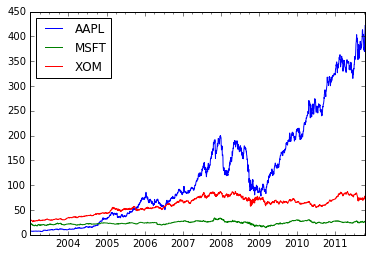

In [138]:
close_px.plot()

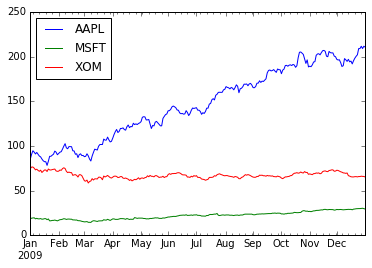

In [139]:
close_px.ix['2009'].plot()

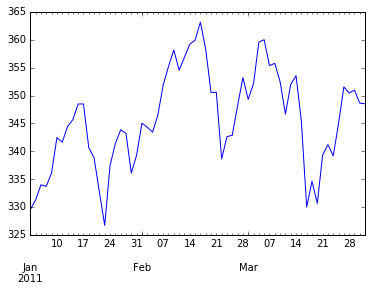

In [143]:
close_px['AAPL'].ix['2011-01':'2011-03'].plot()

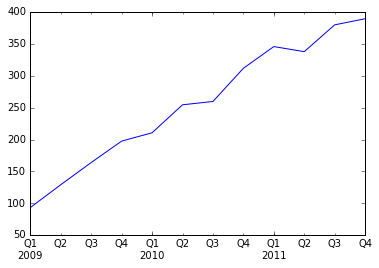

In [146]:
appl_q = close_px['AAPL'].resample('Q-DEC', fill_method='ffill')
appl_q.ix['2009':].plot()

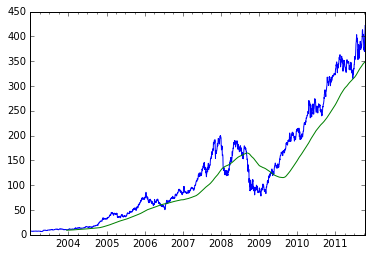

In [149]:
close_px.AAPL.plot()
pd.rolling_mean(close_px.AAPL, 250).plot()

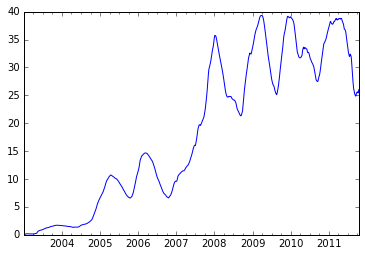

In [150]:
appl_std250 = pd.rolling_std(close_px.AAPL, 250, min_periods=10)
appl_std250.plot()

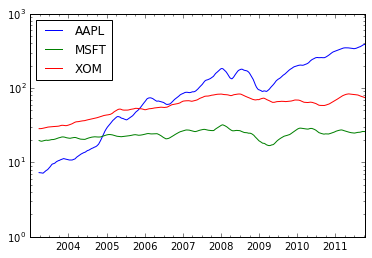

In [151]:
pd.rolling_mean(close_px, 60).plot(logy=True)

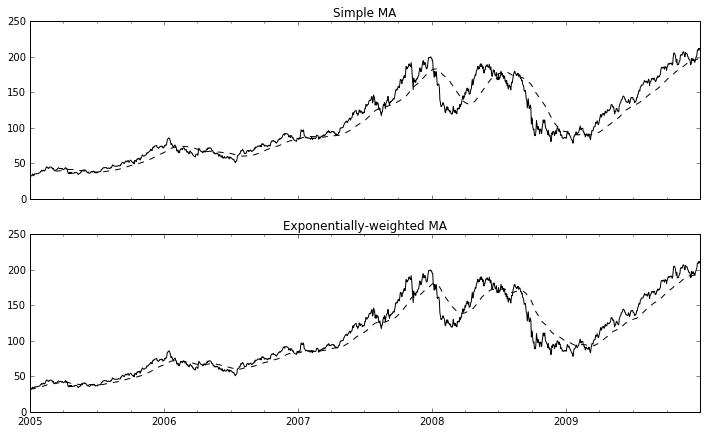

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True, figsize=(12,7))
aapl_px = close_px.AAPL['2005':'2009']
ma60 = pd.rolling_mean(aapl_px, 60, min_periods=50)
ewma60 = pd.ewma(aapl_px, span=60)

aapl_px.plot(style='k-', ax=axes[0])
ma60.plot(style='k--', ax=axes[0])

aapl_px.plot(style='k-', ax=axes[1])
ewma60.plot(style='k--', ax=axes[1])

axes[0].set_title('Simple MA')
axes[1].set_title('Exponentially-weighted MA')

In [15]:
spx_rets = spx_px / spx_px.shift(1) - 1
returns = close_px.pct_change()

corr = pd.rolling_corr(returns.AAPL, spx_rets, 125, min_periods=100)
corr.plot()

NameError: name 'spx_px' is not defined

In [ ]:
corr = pd.rolling_corr(returns, spx_rets, 125, min_periods=100)
corr.plot()

In [16]:
from scipy.stats import percentileofscore

In [17]:
returns = close_px.pct_change()

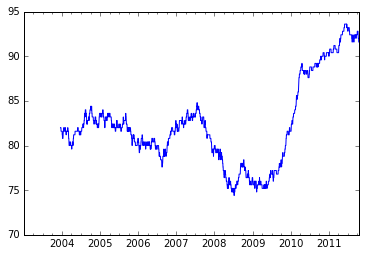

In [18]:
result = pd.rolling_apply(returns.AAPL, 250, lambda x: percentileofscore(x, 0.02))
result.plot()

In [19]:
rng = pd.date_range('1/1/2000', periods=10000000, freq='10ms')
ts = pd.Series(np.random.randn(len(rng)), index=rng)

2000-01-01 00:00:00.000    1.332946
2000-01-01 00:00:00.010   -0.113513
2000-01-01 00:00:00.020    0.329196
2000-01-01 00:00:00.030    0.126816
2000-01-01 00:00:00.040   -0.450121
Freq: 10L, dtype: float64

In [22]:
ts.resample('15min', how='ohlc')

,open,high,low,close
2000-01-01 00:00:00,1.332946,4.682566,-4.328271,-1.222432
2000-01-01 00:15:00,1.218150,4.424634,-4.278986,0.245328
2000-01-01 00:30:00,-0.335590,4.266204,-5.141112,0.662402
2000-01-01 00:45:00,0.928099,4.207178,-4.217708,-0.026927
2000-01-01 01:00:00,-0.216142,4.185423,-4.316278,0.010269
2000-01-01 01:15:00,0.449228,4.275034,-4.264380,0.326552
2000-01-01 01:30:00,-0.578313,4.292546,-4.091739,0.756256
2000-01-01 01:45:00,-1.916088,4.249162,-4.327368,0.627576
2000-01-01 02:00:00,0.079535,4.291219,-4.071582,-0.368814
2000-01-01 02:15:00,0.244263,4.197866,-4.564920,0.673449


In [24]:
%timeit ts.resample('15min', how='ohlc')

1 loop, best of 3: 219 ms per loop


In [25]:
rng = pd.date_range('1/1/2000', periods=10000000, freq='1s')
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [26]:
%timeit ts.resample('15s', how='ohlc')

1 loop, best of 3: 281 ms per loop
